In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Quick Inventory of Depressive Symptomalogy (QIDS)
The QIDS is a 16 item self report measure of severity of depressive symptoms, often used to assess treatment of depression. 
https://www.mdcalc.com/quick-inventory-depressive-symptomatology-qids


#### Create a sample of 1000 patients. Each item ranges from 0-3. 

In [2]:
np.random.seed(42)

In [3]:
df1 = pd.DataFrame(np.random.randint(0, 4, size = (1000,16)),columns=['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10','q11','q12','q13','q14','q15','q16'])

In [4]:
df1.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16
0,2,3,0,2,2,3,0,0,2,1,2,2,2,2,3,0
1,3,3,3,2,1,0,1,3,3,1,1,1,3,3,0,0
2,3,1,1,0,3,0,0,2,2,2,1,3,3,3,3,2
3,1,1,2,1,2,3,2,3,3,0,2,0,2,2,0,0
4,2,1,3,0,3,1,1,1,0,1,0,1,3,3,2,3


In [5]:
df1.describe()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.535000,1.517000,1.479000,1.453000,1.503000,1.505000,1.45000,1.508000,1.494000,1.48200,1.461000,1.47800,1.527000,1.495000,1.467000,1.408000
std,1.116253,1.124712,1.137916,1.124747,1.110506,1.119477,1.11837,1.092305,1.113195,1.12825,1.127719,1.10033,1.132499,1.104171,1.133223,1.134382
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,0.00000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000
50%,2.000000,1.500000,1.000000,1.000000,1.000000,2.000000,1.00000,2.000000,1.000000,1.00000,1.000000,1.00000,2.000000,2.000000,1.000000,1.000000
75%,3.000000,3.000000,3.000000,2.000000,3.000000,2.250000,2.00000,2.000000,2.000000,2.00000,2.000000,2.00000,3.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000


#### Scoring and Severity Algorithms

In [6]:
def score(x):
    s1,s2,s3,s_total = (0,0,0,0)
    s1 = max(x['q1'],x['q2'],x['q3'],x['q4'])
    s2 = max(x['q6'],x['q7'],x['q8'],x['q9'])
    s3 = max(x['q15'],x['q16'])
    s_total = s1 + s2 + s3 + x['q5'] + x['q10'] + x['q11'] + x['q12'] + x['q13'] + x['q14']
    return s_total

In [7]:
def severity(x):
    if(x['scores']<=5):
        return 'Not Depressed'
    elif(x['scores']<=10):
        return 'Mild'
    elif(x['scores']<=15):
        return 'Moderate'
    elif(x['scores']<=20):
        return 'Severe'
    else:
        return 'Very Severe'

In [8]:
df1['scores'] = df1.apply(score, axis=1)
df1['severity'] = df1.apply(severity, axis=1)

In [9]:
df1.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,scores,severity
0,2,3,0,2,2,3,0,0,2,1,2,2,2,2,3,0,20,Severe
1,3,3,3,2,1,0,1,3,3,1,1,1,3,3,0,0,16,Severe
2,3,1,1,0,3,0,0,2,2,2,1,3,3,3,3,2,23,Very Severe
3,1,1,2,1,2,3,2,3,3,0,2,0,2,2,0,0,13,Moderate
4,2,1,3,0,3,1,1,1,0,1,0,1,3,3,2,3,18,Severe


#### Plot data

In real world 'not depressed' or 'mild' would far out number 'severe' rating

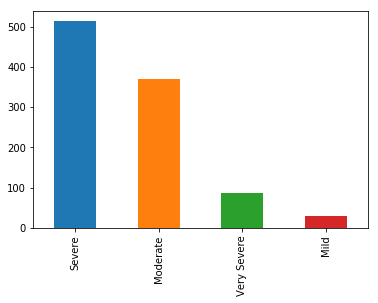

In [10]:
df1['severity'].value_counts().plot(kind='bar')

In [11]:
df1['severity'].value_counts()

Severe         514
Moderate       369
Very Severe     88
Mild            29
Name: severity, dtype: int64

#### Clean up plot order
plot function displays in descending order. Normally not an issues but with psych measures we want to display by least to most severe not by count. 

In [12]:
qids_severity_order = ['Not Depressed','Mild','Moderate','Severe','Very Severe']

In [13]:
score_count = df1['severity'].value_counts().reindex(qids_severity_order)

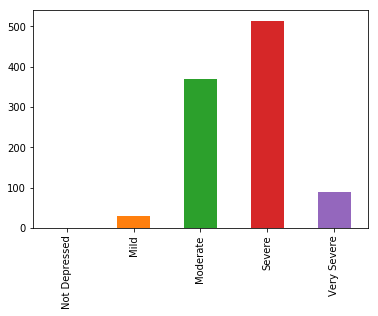

In [14]:
score_count.plot(kind='bar')